## PROBLEM : CLUSTERING

* The dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

### Q 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc.,)

### Importing all Required Libraries

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [215]:
df=pd.read_csv('State_wise_Health_income-1.csv')

In [216]:
df.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [217]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [218]:
df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22


In [219]:
df.shape

(297, 5)

In [220]:
df.duplicated().sum()

0

In [221]:
pd.DataFrame(df.dtypes,columns=['Data_Type']).rename_axis(index='Feature')

,Data_Type
Feature,
States,object
Health_indeces1,int64
Health_indices2,int64
Per_capita_income,int64
GDP,int64


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States             297 non-null    object
 1   Health_indeces1    297 non-null    int64 
 2   Health_indices2    297 non-null    int64 
 3   Per_capita_income  297 non-null    int64 
 4   GDP                297 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 11.7+ KB


In [223]:
df.describe().round(2)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,297.00,297.00,297.00,297.00
mean,2630.15,693.63,2156.92,174601.12
std,2038.51,468.94,1491.85,167167.99
min,-10.00,0.00,500.00,22.00
25%,641.00,175.00,751.00,8721.00
50%,2451.00,810.00,1865.00,137173.00
75%,4094.00,1073.00,3137.00,313092.00
max,10219.00,1508.00,7049.00,728575.00


In [224]:
df.States.value_counts()

Dromore          2
GibsonHill       1
Drumsurn         1
Ilinden          1
Cogry            1
                ..
Krandzhilitsa    1
Zheleznitsa      1
Petrelik         1
Craigavon        1
Conlig           1
Name: States, Length: 296, dtype: int64

## Exploratory Data Analysis

### Checking for null values

In [225]:
pd.DataFrame(df.isnull().sum(),columns=['Count_of_Null_Values']).rename_axis(index='Feature')

,Count_of_Null_Values
Feature,
States,0
Health_indeces1,0
Health_indices2,0
Per_capita_income,0
GDP,0


* There are no null values in the given dataset.

### Checking for duplicate observations

In [226]:
df.duplicated().sum()

0

### Checking for Outliers 

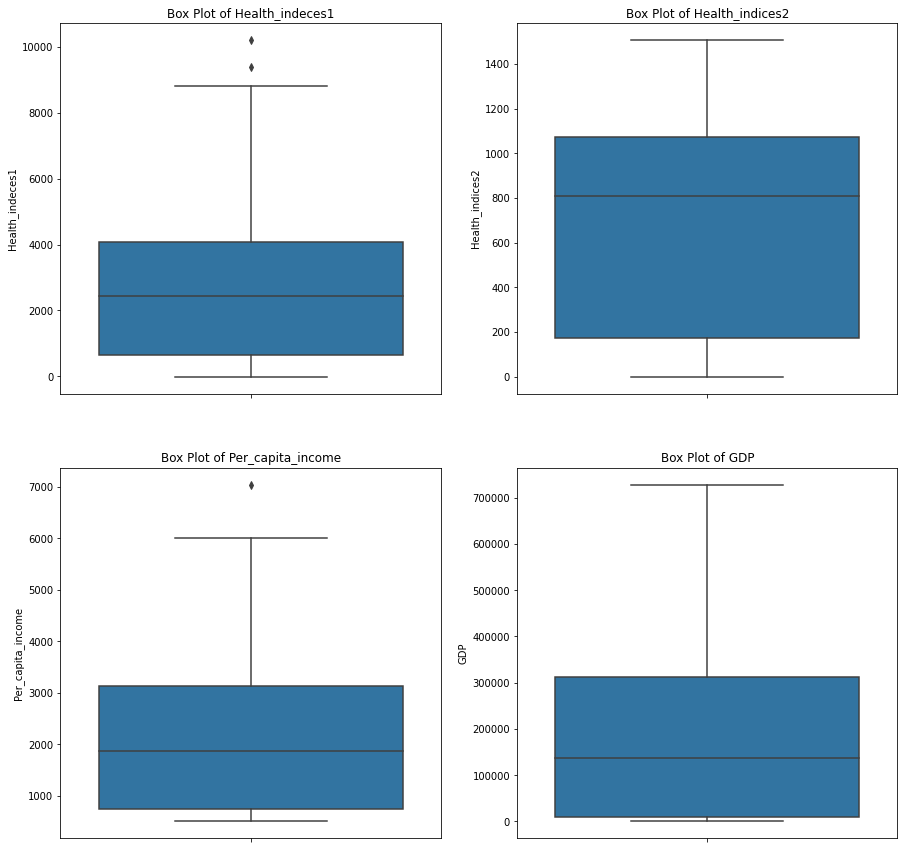

In [227]:
plt.figure(figsize=(15,15))
j=1
for i in df.columns.drop('States'):
    plt.subplot(2,2,j)
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i)
    j=j+1

In [228]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(data=df[(df<lr)|(df>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

,No. of Outliers,Percentage of Outliers
Feature,,
Health_indeces1,2,0.7
Per_capita_income,1,0.3
GDP,0,0.0
Health_indices2,0,0.0
States,0,0.0


### Insights

* There are outliers in Health Indices1 and Per capita income features.
* The outliers in Health Indices1 and Per capita income features are 0.7% and 0.3% respectively.
* Outliers are treated by capping and flooring method.

### Treating Outliers 

In [229]:
for i in df.columns.drop('States'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

In [230]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
b=pd.DataFrame(data=df[(df<lr)|(df>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
b['Percentage of Outliers']=b['No. of Outliers']/df.shape[0]*100
b = b.rename_axis(index='Feature')
round(b,1)

,No. of Outliers,Percentage of Outliers
Feature,,
GDP,0,0.0
Per_capita_income,0,0.0
Health_indices2,0,0.0
Health_indeces1,0,0.0
States,0,0.0


### Univariate Analysis

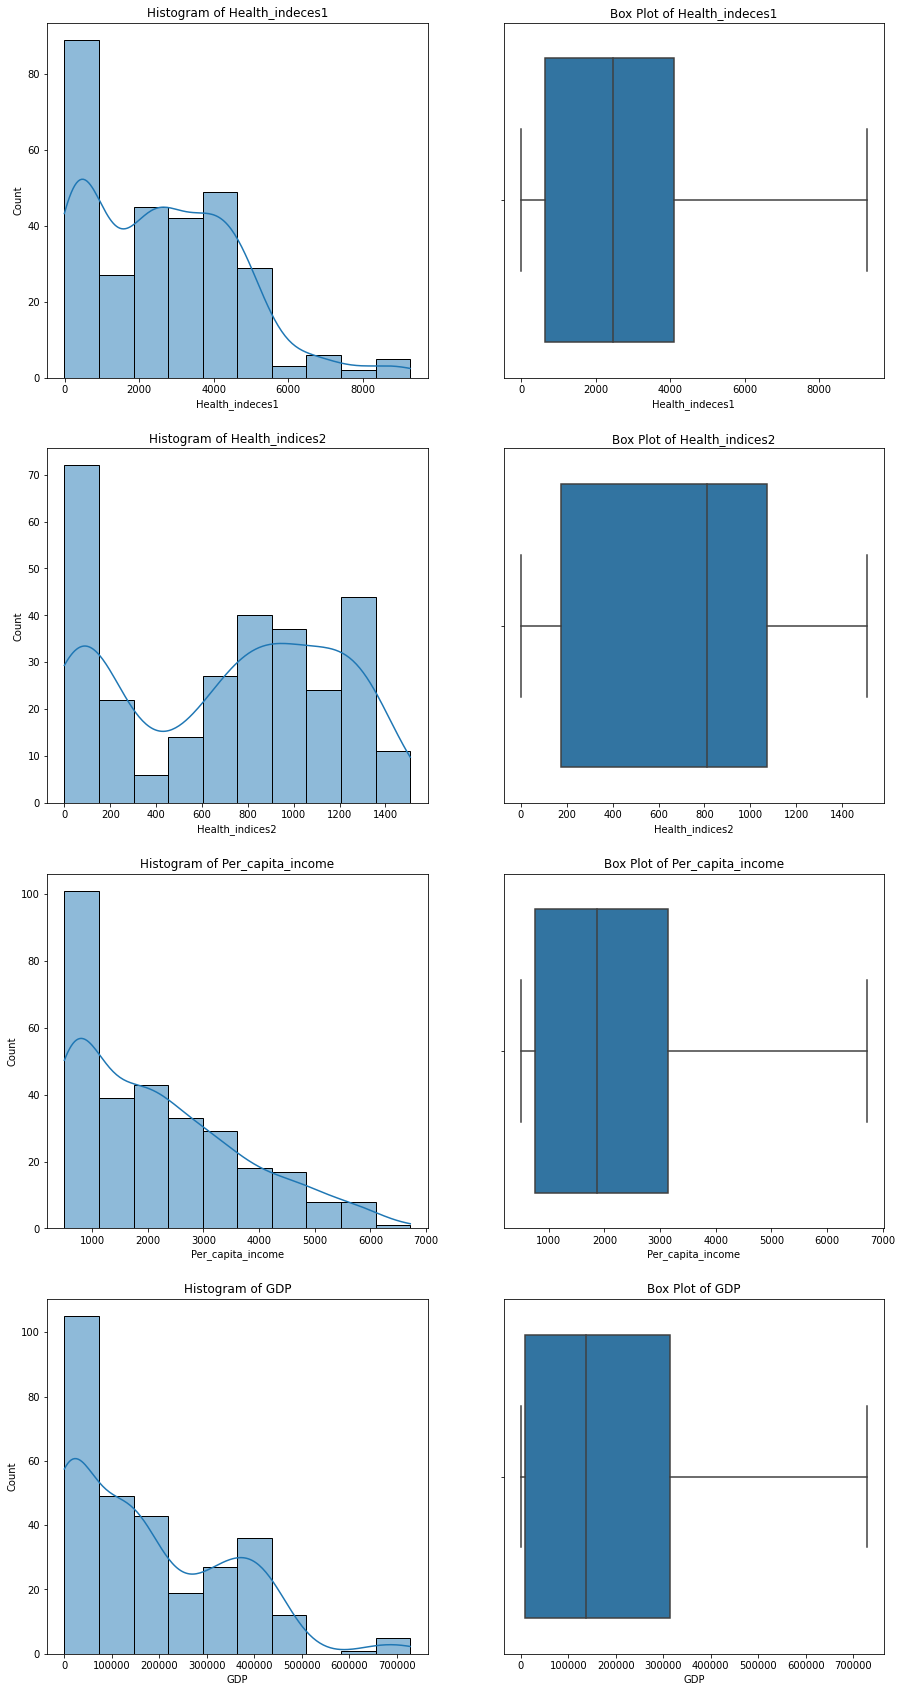

In [231]:
plt.figure(figsize=(15,30))
j=1
for i in df.columns.drop('States'):
    plt.subplot(4,2,j)
    sns.histplot(df[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(4,2,k)
    sns.boxplot(df[i]);
    plt.title('Box Plot of '+i)
    j=k+1

### Skewness

In [232]:
pd.DataFrame(df.skew(),columns=['skewness']).round(2).rename_axis(index='Feature')

,skewness
Feature,
Health_indeces1,0.67
Health_indices2,-0.17
Per_capita_income,0.81
GDP,0.83


### Kurtosis

In [233]:
pd.DataFrame(df.kurtosis(),columns=['kurtosis']).round(2).rename_axis(index='Feature')

,kurtosis
Feature,
Health_indeces1,0.22
Health_indices2,-1.40
Per_capita_income,-0.19
GDP,0.06


### Insights:

From above plots and tables, we can conclude below points,
1.	Except Health Indeces2 feature, all other features are right skewed distributions (Positively skewed).
2.	Health Indeces1 and GDP features have positive kurtosis.
3.	Health Indeces2 and Per capita income features have negative kurtosis.

## Bivariate Analysis

### Pair Plot

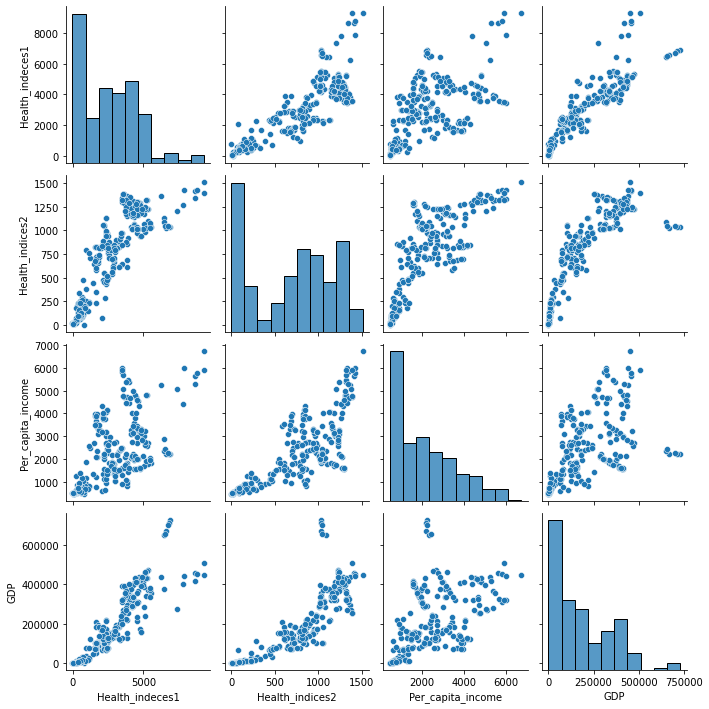

In [234]:
sns.pairplot(data=df);

### Heat Map

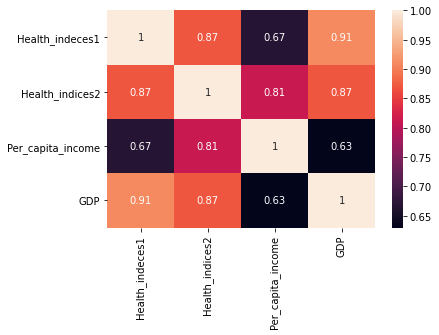

In [235]:
sns.heatmap(df.corr(),annot=True);

### Insights:

From above Pair-Plot and Heatmap, we can conclude below points,
1.	Few features have strong correlation between them like Health indeces1 & GDP (0.91), Health indeces2 & GDP (0.87).
2.	Few features have moderate correlation between them like Health indeces1 & Per capita income (0.67), GDP & Per capita income (0.63).

### Q 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [236]:
c=df.describe().T
c=c[['mean','std','min','max']]
c['variance']=c['std']**2
c = c.rename_axis(index='Feature')
round(c,1)

,mean,std,min,max,variance
Feature,,,,,
Health_indeces1,2626.5,2025.9,-10.0,9273.5,4.104160e+06
Health_indices2,693.6,468.9,0.0,1508.0,2.199088e+05
Per_capita_income,2155.8,1488.3,500.0,6716.0,2.214995e+06
GDP,174601.1,167168.0,22.0,728575.0,2.794514e+10


* Generally, Scaling improves the performance of all distance-based models because if we don’t scale the data, it gives higher weightage to features which have higher magnitude. Hence, it is always advisable to bring all the features to the same scale before proceeding to distance-based algorithms like Agglomerative clustering and K-Means Clustering.
* In this dataset, the magnitudes of the statistical parameters like Mean, Standard Deviation, Variance, Minimum and Maximum are significantly different for all features (Refer below table). Hence, scaling is required to bring all the features into a common scale before proceeding to clustering.
* We can use z-score method to scale the data i.e., finding z-score value for each and every observation in the dataset by using following formula.
         Z Score=((x-µ))/Sigma
         Where, x = Value of the observation
		 µ = Mean
		 Sigma = Standard Deviation

### Q 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

### Scaling the Data by Using Z-Score Method

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss=StandardScaler()
dfscaled=pd.DataFrame(ss.fit_transform(df.drop('States',axis=1)),columns=df.columns.drop('States'))

### Sample of the Scaled Dataset

In [26]:
dfscaled.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.092498,-1.340654,-1.071354,-1.035304
1,-0.564428,-0.101746,0.373007,-0.604838
2,-0.975314,-0.842955,-0.707908,-0.882536
3,-1.203748,-1.428232,-1.065297,-1.044730
4,-1.277421,-1.464545,-1.095584,-1.046096


In [27]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

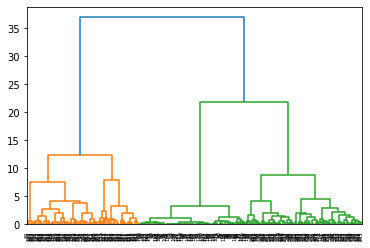

In [28]:
lk=linkage(dfscaled,method='ward')
dgrm=dendrogram(lk)

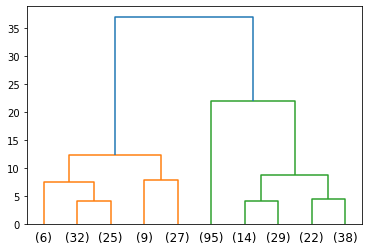

In [29]:
lk=linkage(dfscaled,method='ward')
dgrm=dendrogram(lk,p=10,truncate_mode='lastp')

### Selecting the Optimum Number of Clusters:
* From above Truncated Dendrogram, it can be noticed that the distance or increase in within sum squares (WSS) is large (length of blue line) to merge last two clusters into single final cluster. 
* Hence, we can select the optimum number of clusters are two. But according the business, making two clusters will not add any additional benefit over without clustering. So, it is not correct.
* The next optimum number of clusters selected based on distance (length of green line) or increase in within sum squares (WSS) are three.

In [30]:
Hclusters=fcluster(lk,3,criterion='maxclust')
Hclusters

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2,
       2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int3

In [31]:
dfhc=df.copy()

In [32]:
dfhc['Hclusters']=Hclusters

In [33]:
dfhc.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters
0,Bachevo,417.0,66.0,564.0,1823.0,2
1,Balgarchevo,1485.0,646.0,2710.0,73662.0,3
2,Belasitsa,654.0,299.0,1104.0,27318.0,2
3,Belo_Pole,192.0,25.0,573.0,250.0,2
4,Beslen,43.0,8.0,528.0,22.0,2


In [34]:
dfhc.Hclusters.value_counts()

3    103
1     99
2     95
Name: Hclusters, dtype: int64

### Customer Segmentation

In [35]:
dfhc.groupby(by='Hclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Hclusters,,,,
1,4912.7,1201.6,3371.8,377132.5
2,401.1,104.5,680.7,5388.8
3,2481.8,748.7,2347.6,136004.7


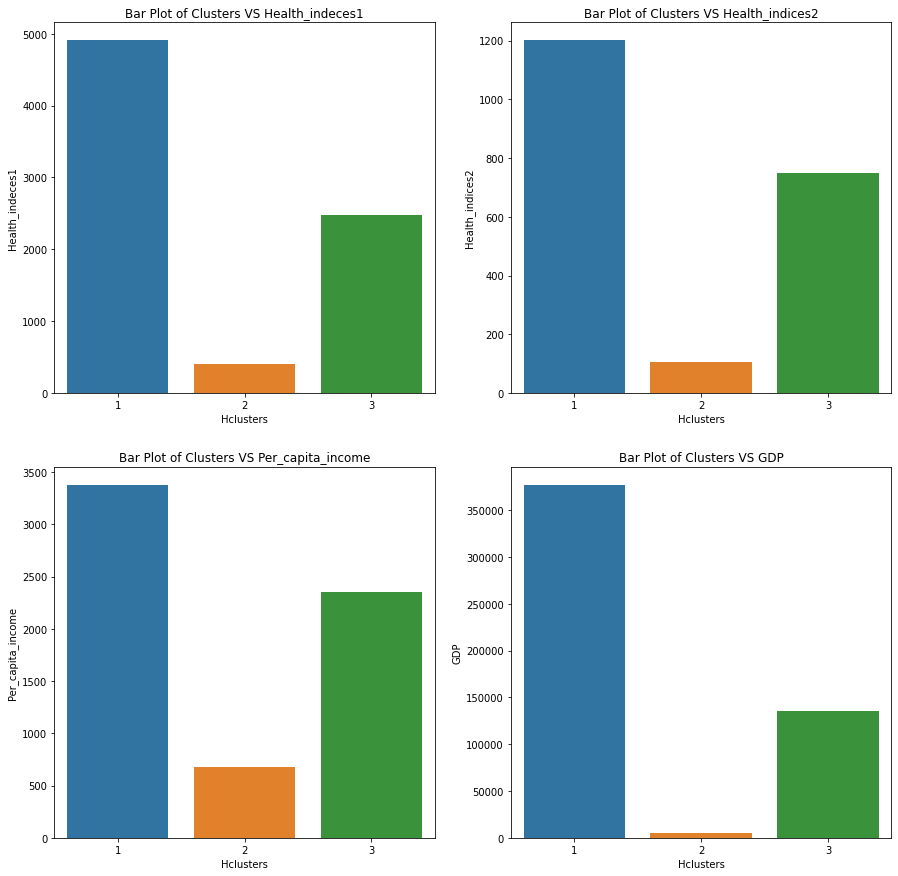

In [36]:
plt.figure(figsize=(15,15))
j=1
for i in dfhc.columns.drop(['Hclusters','States']):
    plt.subplot(2,2,j)
    #t=dfhc.groupby('Hclusters').mean().sort_values(i,ascending=False)
    sns.barplot(y=dfhc[i],x=dfhc.Hclusters,ci=False);
    plt.title('Bar Plot of Clusters VS '+i)
    j=j+1

### Insights:
The coordinates of each cluster’s centroid are shown in table 11 so that means of each feature in different clusters can be compared. From above table and bar plots, we can write below conclusions. 
* Means of all features decreases in the order of cluster1, cluster3, cluster2.
* The states in cluster 1 have high health indices, high Per capita income and high GDP.
* The states in cluster 2 have low health indices, low Per capita income and low GDP.
* The states in cluster 3 have moderate health indices, moderate Per capita income and moderate GDP.

### Visualization of Hierarchical Clusters

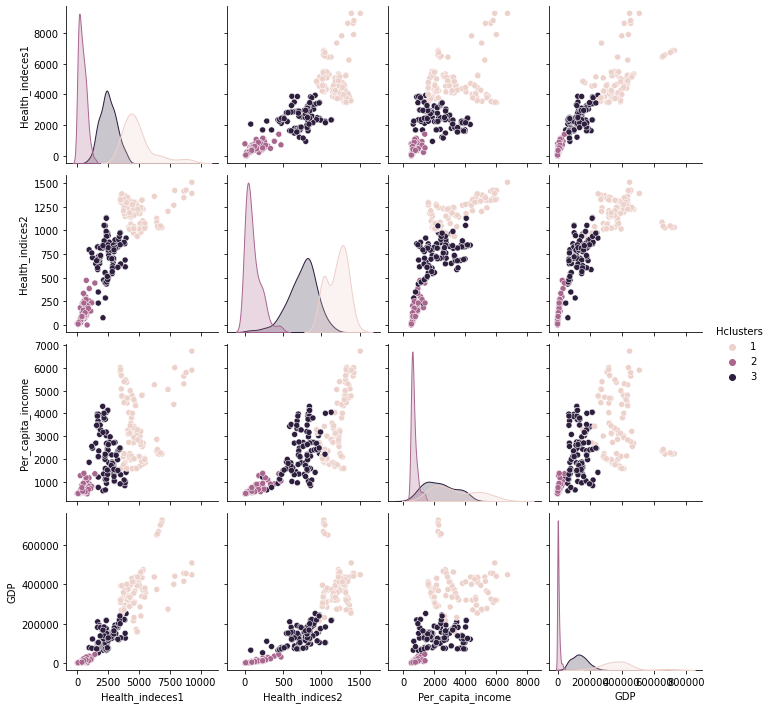

In [37]:
sns.pairplot(data=dfhc,hue='Hclusters');

* The above pair plot indicates that all customers are properly segregated into three clusters based on their similarities.

### Q 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

### Optimum No. of Clusters by Elbow Plot Method

In [39]:
# wss--within sum squares
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1,max_iter=1000)
    km.fit(dfscaled)
    wss.append(km.inertia_)

In [40]:
u=pd.DataFrame(wss,columns=['WSS'])
u['Number_of_Clusters']=range(1,11)

In [41]:
u=u[['Number_of_Clusters','WSS']]
u.round(2)

,Number_of_Clusters,WSS
0,1,1188.00
1,2,469.38
2,3,258.45
3,4,181.74
4,5,147.73
5,6,116.60
6,7,90.01
7,8,78.99
8,9,70.09
9,10,63.15


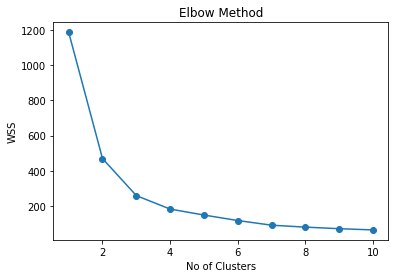

In [42]:
plt.plot(range(1,11),wss,marker='o');
plt.xlabel('No of Clusters');
plt.ylabel('WSS');
plt.title('Elbow Method');

### Optimum No. of Clusters by Silhouette Score Method

In [43]:
# silscore--silhouette_score
silscore=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=1,max_iter=1000)
    km.fit(dfscaled)
    silscore.append(silhouette_score(dfscaled,km.labels_))

In [44]:
v=pd.DataFrame(silscore,columns=['Silhouette_Score'])
v['Number_of_Clusters']=range(2,11)

In [45]:
v=v[['Number_of_Clusters','Silhouette_Score']]
v.round(2)

,Number_of_Clusters,Silhouette_Score
0,2,0.53
1,3,0.53
2,4,0.55
3,5,0.52
4,6,0.53
5,7,0.56
6,8,0.53
7,9,0.51
8,10,0.49


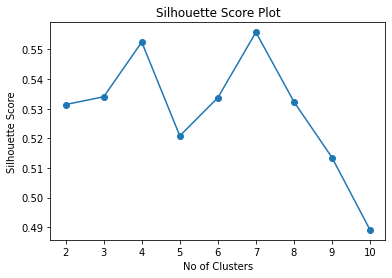

In [46]:
plt.plot(range(2,11),silscore,marker='o');
plt.xlabel('No of Clusters');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score Plot');

#### Optimum No. of Clusters
* Pending

In [47]:
# For three clusters
kmf=KMeans(n_clusters=3,random_state=1)
kmf.fit(dfscaled)

KMeans(n_clusters=3, random_state=1)

In [48]:
kmclusters=kmf.labels_
kmclusters

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
dfkmc=dfhc.copy()

In [50]:
dfkmc['kmclusters']=kmclusters

In [51]:
dfkmc.drop('Hclusters',axis=1).head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,kmclusters
0,Bachevo,417.0,66.0,564.0,1823.0,0
1,Balgarchevo,1485.0,646.0,2710.0,73662.0,1
2,Belasitsa,654.0,299.0,1104.0,27318.0,0
3,Belo_Pole,192.0,25.0,573.0,250.0,0
4,Beslen,43.0,8.0,528.0,22.0,0


### Sil Width

In [52]:
dfscaled.shape

(297, 4)

In [53]:
sill_width=silhouette_samples(dfscaled,kmclusters).round(4)
sill_width

array([ 0.8788,  0.429 ,  0.6909,  0.8761,  0.8619,  0.8667,  0.8779,
        0.329 ,  0.8409,  0.5778,  0.8801,  0.8741,  0.8626,  0.8008,
        0.5974,  0.8191,  0.2886,  0.7665,  0.7406,  0.3216,  0.6116,
        0.8459,  0.8351,  0.8693,  0.5616,  0.8272,  0.5628,  0.4988,
        0.4535,  0.8679,  0.1716,  0.8762,  0.8617, -0.0248,  0.8737,
        0.8582,  0.3459,  0.0849,  0.8269,  0.6378,  0.8673,  0.7316,
        0.4681,  0.3233,  0.3569,  0.8123,  0.8066,  0.2004,  0.8788,
        0.8662,  0.8789,  0.5544,  0.8779,  0.4058,  0.8776,  0.594 ,
        0.5368,  0.8667,  0.8799,  0.4769,  0.4489,  0.685 ,  0.7269,
        0.4814,  0.2338,  0.8672,  0.3732,  0.8722,  0.8312,  0.8641,
        0.8608,  0.2778,  0.874 ,  0.8713,  0.8787,  0.855 ,  0.6109,
        0.4762,  0.7922,  0.8666,  0.8785,  0.8673,  0.8812,  0.8289,
        0.5139,  0.5994,  0.8701,  0.8728,  0.7904,  0.3626,  0.8807,
        0.8691,  0.8786,  0.3295,  0.5034,  0.8089,  0.475 ,  0.8722,
        0.318 ,  0.0

In [54]:
print('Maximum Sill Width', silhouette_samples(dfscaled,kmclusters).max().round(3))
print('Minimum Sill Width', silhouette_samples(dfscaled,kmclusters).min().round(3))
print('Average Sill Width', silhouette_samples(dfscaled,kmclusters).mean().round(3))

Maximum Sill Width 0.882
Minimum Sill Width -0.081
Average Sill Width 0.534


In [55]:
sill_width[sill_width<0]

array([-0.0248, -0.0177, -0.0118, -0.0805])

## Customer Segmentation

In [56]:
dfkmc.kmclusters.value_counts()

1    101
0    101
2     95
Name: kmclusters, dtype: int64

In [57]:
dfkmc.drop('Hclusters',axis=1).groupby('kmclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
kmclusters,,,,
0,499.2,116.4,693.8,9428.1
1,2597.1,783.0,2464.1,141264.1
2,4919.6,1212.3,3382.3,385648.6


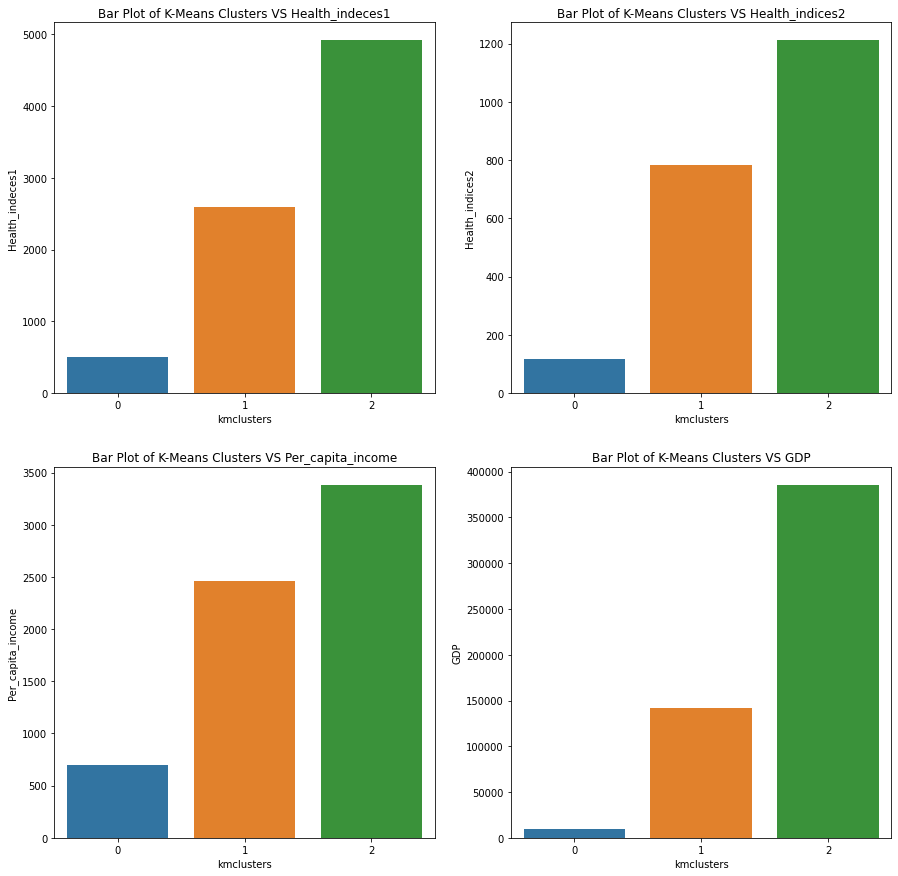

In [58]:
plt.figure(figsize=(15,15))
j=1
for i in dfkmc.columns.drop(['States','Hclusters','kmclusters']):
    plt.subplot(2,2,j)
    sns.barplot(y=dfkmc[i],x=dfkmc.kmclusters,ci=False);
    plt.title('Bar Plot of K-Means Clusters VS '+i)
    j=j+1

### Insights:
The coordinates of each cluster’s centroid are shown in table 15 so that means of each feature in different clusters can be compared. From above table and bar plots, we can write below conclusions. 
* Means of all features increases in the order of cluster 0, cluster 1 and cluster 2.
* The states in cluster 2 have high health indices, high Per capita income and high GDP.
* The states in cluster 0 have low health indices, low Per capita income and low GDP.
* The states in cluster 1 have moderate health indices, moderate Per capita income and moderate GDP.

### Visualization of K-Means Clusters

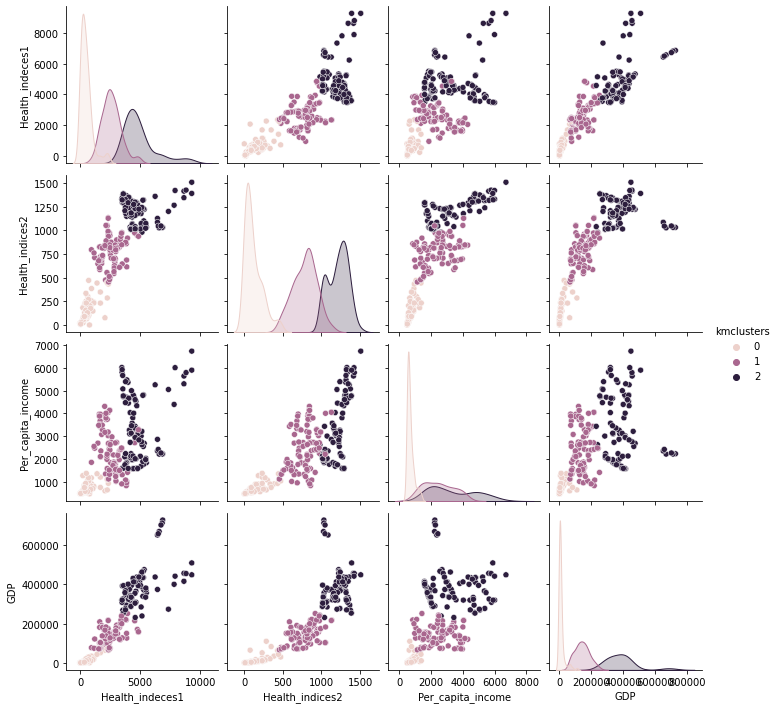

In [59]:
sns.pairplot(data=dfkmc.drop('Hclusters',axis=1),hue='kmclusters');

* The above pair plot indicates that all customers are properly segregated into three clusters based on their similarities.

In [60]:
dfkmc.kmclusters.value_counts()

1    101
0    101
2     95
Name: kmclusters, dtype: int64

In [61]:
dfkmc[dfkmc.kmclusters==0].States.unique()

array(['Bachevo', 'Belasitsa', 'Belo_Pole', 'Beslen', 'Bogolin',
       'Bogoroditsa', 'Budiltsi', 'Churicheni', 'Churilovo', 'Debochitsa',
       'Dobarsko', 'Dobri_Laki', 'Dolen', 'Drakata', 'Drangovo', 'Garmen',
       'Gega', 'Godeshevo', 'Gyurgevo', 'Ilinden', 'Kamena', 'Klyuch',
       'Kochan', 'Kolarovo', 'Krandzhilitsa', 'Krastiltsi', 'Kulata',
       'Leshko', 'Logodazh', 'Moshtanets', 'Nikudin', 'Osina', 'Padesh',
       'Palat', 'Pletena', 'Polenitsa', 'Rupite', 'Satovcha', 'Struma',
       'Strumeshnitsa', 'Sushitsa', 'Vaklinovo', 'Valkosel', 'Vishlene',
       'Valkovo', 'Yavornitsa', 'Zanoga', 'Blagoevgrad', 'Zelenodol',
       'ZoycheneBallela', 'Ballerin', 'Ballinamallard', 'Ballintoy',
       'Balloo', 'Ballybogy', 'Ballycarry', 'Ballycastle', 'Ballyclare',
       'Ballyeaston', 'Ballygawley', 'Ballygowan', 'Ballyhalbert',
       'Ballyhornan', 'Ballykelly', 'Ballykinler', 'Ballylinney',
       'Ballymacmaine', 'Ballymagorry', 'Ballymartin', 'Ballymena',
       'Bally

In [62]:
dfkmc[dfkmc.kmclusters==1].States.unique()

array(['Balgarchevo', 'Cherniche', 'Gabrovo', 'Gorna_Breznitsa',
       'Ivanovo', 'Kalimantsi', 'Krupnik', 'Lebnitsa', 'Mendovo',
       'Mihnevo', 'Mikrevo', 'Obidim', 'Petrelik', 'Pravo_Bardo',
       'Ribnik', 'Slashten', 'Starchevo', 'Suhostrel', 'Tuhovishta',
       'Volno', 'Zheleznitsa', 'Zhizhevo', 'Ballycassidy', 'Ballylesson',
       'Ballymacnab', 'Ballymoney', 'Ballynure', 'Ballyrashane',
       'Ballyskeagh', 'Ballystrudder', 'Banagher', 'Bannfoot', 'Belleek',
       'Bendooragh', 'Brockagh', 'Broomhill', 'Burnfoot', 'Camlough',
       'Kilbride', 'Cullyhanna', 'Desertmartin', 'Downhill',
       'Downpatrick', 'Draperstown', 'Drinns_Bay', 'Dromara', 'Dromintee',
       'Dromore', 'Drumaness', 'Drumbo', 'Drumlaghy', 'Drumlough',
       'Drummullan', 'Drumnacanvy', 'Drumnakilly', 'Drumquin',
       'Drumraighland', 'Drumsurn', 'Dunadry', 'Dundonald', 'Dundrod',
       'Dundrum', 'Dungannon', 'Dungiven', 'Dunloy', 'Dunnamanagh',
       'Dunmurry', 'Dunnamore', 'Dunnaval', 'D

In [63]:
dfkmc[dfkmc.kmclusters==2].States.unique()

array(['Buchino', 'Dolene', 'Fargovo', 'Kolibite', 'Kribul', 'Polena',
       'Strumyani', 'Ballygalley', 'Ballymaguigan', 'Ballyscullion',
       'Bellanaleck', 'Burren', 'Capecastle', 'Cappagh', 'Cargan',
       'Carnalbanagh', 'Carncastle', 'Carnlough', 'Carnteel',
       'Carrickaness', 'Carrickfergus', 'Carrickmore', 'Carrowclare',
       'Carrowdore', 'Carrybridge', 'Carryduff', 'Castlecaulfield',
       'Castledawson', 'Castlederg', 'Castlerock', 'Castlewellan',
       'Charlemont', 'Clabby', 'Clady', 'Cladymore', 'Clanabogan',
       'Claudy', 'Clogh', 'Clogher', 'Cloghy', 'Clonmore', 'Clonoe',
       'Clough', 'Cloughmills', 'Coagh', 'Coalisland', 'Cogry',
       'Coleraine', 'Collegeland', 'Comber', 'Conlig', 'Cookstown',
       'Corbet', 'Corkey', 'Corrinshego', 'Craigarogan', 'Craigavon',
       'Cranagh', 'Cranford', 'Crawfordsburn', 'Creagh', 'Creggan',
       'Crossgar', 'Crossmaglen', 'Crumlin', 'Cullaville', 'Cullybackey',
       'Culmore', 'Culnady', 'Curran', 'Cushen

### Q 1.5 Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

### Mapping of K-Means Clusters with Hierarchical Clusters

In [64]:
dfkmc.head(10)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters,kmclusters
0,Bachevo,417.0,66.0,564.0,1823.0,2,0
1,Balgarchevo,1485.0,646.0,2710.0,73662.0,3,1
2,Belasitsa,654.0,299.0,1104.0,27318.0,2,0
3,Belo_Pole,192.0,25.0,573.0,250.0,2,0
4,Beslen,43.0,8.0,528.0,22.0,2,0
5,Bogolin,69.0,14.0,527.0,73.0,2,0
6,Bogoroditsa,307.0,69.0,707.0,1724.0,2,0
7,Buchino,9273.5,1508.0,6716.0,449003.0,1,2
8,Budiltsi,744.0,115.0,809.0,7497.0,2,0
9,Cherniche,2975.0,857.0,1600.0,153299.0,3,1


In [65]:
dfhc.groupby('Hclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Hclusters,,,,
1,4912.7,1201.6,3371.8,377132.5
2,401.1,104.5,680.7,5388.8
3,2481.8,748.7,2347.6,136004.7


In [66]:
dfkmc.drop('Hclusters',axis=1).groupby('kmclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
kmclusters,,,,
0,499.2,116.4,693.8,9428.1
1,2597.1,783.0,2464.1,141264.1
2,4919.6,1212.3,3382.3,385648.6


### Conclusions:
By comparing means of different features in Hierarchical Clustering & K-Means Clustering, we can notice below key points.
* Cluster 1 in Hierarchical Clustering (high health indices, high Per capita income and high GDP) is equivalent to Cluster 2 in K-Means Clustering.
* Cluster 2 in Hierarchical Clustering (low health indices, low Per capita income and low GDP) is equivalent to Cluster 0 in K-Means Clustering.
* Cluster 3 in Hierarchical Clustering (moderate health indices, moderate Per capita income and moderate GDP) is equivalent to Cluster 1 in K-Means Clustering.